WE CAN WRITE OUR OWN RANDOM GRID SEARCH CV.
IT IS A CROSS VALIDATION SPLIT TECHNIQUE IN ORDER TO FIND THE GOOD HYPERPARAMATERS.  

please enter number of samples in the dataset : 100
please enter number of folds you need < 10 :   3
define k range: please enter the lower limit:   1
define k range: please enter the high limit > 10:    50


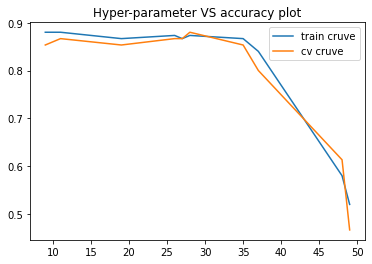

In [10]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import warnings
warnings.filterwarnings("ignore")

#################################Random Search cv definition#####################################
def RandomSearchCV(x_train,y_train,classifier,k_val,folds):
    X_train=[];Y_train=[];cvscores=[];trainscores=[];testscores=[]
    #######################DIVIDE x_train into k fold#################################
   
    #The idea is simple. If we have 5 folds that implies we divide the the data into 5 parts.
    
    #x_train[j*int((len(x_train)/folds)):(j+1)*int((len(x_train)/folds))] -->It takes selected jth part from the 5 parts. So inorder to move 
                  # over these 5 parts, we assign a variable j and move it part by part. Please watch below "for" loop.
    
    for j in range(0,folds):
        if ((j+1)*int((len(x_train)/folds)))<= int(len(x_train)) and ((j+1)*int((len(y_train)/folds)))<= int(len(y_train)):
                       X_train.append(x_train[j*int((len(x_train)/folds)):(j+1)*int((len(x_train)/folds))])
                       Y_train.append(y_train[j*int((len(y_train)/folds)):(j+1)*int((len(y_train)/folds))])

      # So every part is being appended in X_train and Y_train. Seperate steps are given below "If condition above" for this
      
      #Now we have data divided into parts. We will then take a k neighbour and apply training and testing of train and cv data.
      
      #What is cv Data? Simple for 5 parts of your train every 4 parts goes to train and remaining one is cv data.

      #Start with K values now
    for k in (k_val):       ################### for every k neighbor value##################
        
        trainscores_folds = [];testscores_folds = [] # these will handle the mean accuracy scores for every k

        for j in range(0, folds):       #####################for every fold/part#######################      
        #####selecting  data points accordingly, also X_train,Y_train,Xtrain,Ytrain:list #############              
                    Xtrain=[];Ytrain=[];Xtest=[];Ytest=[]
                    for t in range(0,folds):
                      #the below eqn has RHS which tells the part in the data taken, ex:j=2 means second part taken. 
                      if folds-1-t != j:   ######### when this value becomes equal then data->cv
                                
                                  Xtrain.append(X_train[t]);Ytrain.append(Y_train[t])
                      else:
                                  Xtest.append(X_train[folds-1-j]);Ytest.append(Y_train[folds-1-j])

                    
                    #### fitting the k neighbors for the jth part being cv and the remaining being train data 
                    classifier.n_neighbors = k

                    #Note: Please fit the x data in 2-d array, y data(class label) will be 1 d array
                    classifier.fit(np.array(Xtrain).reshape((folds-1)*len(Xtrain[0]),2),np.array(Ytrain).reshape((folds-1)*len(Ytrain[0])))

                    #### prediction and accuracy scores for test##################################################    
                    Y_predicted = classifier.predict(np.array(Xtest).reshape(len(Xtest[0]),2))
                    testscores_folds.append(accuracy_score(np.array(Ytest).reshape(len(Ytrain[0])), Y_predicted))# used accuracy score as metric

                    #### prediction and accuracy scores for train ################################################
                    Y_predicted = classifier.predict(np.array(Xtrain).reshape((folds-1)*len(Xtrain[0]),2))
                    trainscores_folds.append(accuracy_score(np.array(Ytrain).reshape((folds-1)*len(Ytrain[0])), Y_predicted))

        #Mean scores for every k neighbour value
        testscores.append(np.mean(np.array(testscores_folds)))# average CV score for all the parts for a k value
        trainscores.append(np.mean(np.array(trainscores_folds)))
    return trainscores,testscores

sample_size=int(input('please enter number of samples in the dataset : '))
x,y = make_classification(n_samples=sample_size, n_features=2, n_informative=2,n_redundant= 0, n_clusters_per_class=1, random_state=60)
x_train, x_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

####################################GET # OF FOLDS################################################
folds=int(input('please enter number of folds you need < 10 :   '))

low_lim=int(input('define k range: please enter the lower limit:   '))
hig_lim=int(input('define k range: please enter the high limit > 10:    '))


###################################GET 10 UNIQUE K VALUES#########################################
k_val=random.sample(range(low_lim,hig_lim),10);k_val=sorted(k_val,reverse=False)

#Considering simple k neighbours algorithm
neigh = KNeighborsClassifier()
trainscores,cvscores=RandomSearchCV(x_train,y_train,neigh,k_val,folds)


################################## plotting the accuracy plot######################################
plt.plot(k_val,trainscores, label='train cruve')
plt.plot(k_val,cvscores, label='cv cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

AS THE BEST K-NEIGHBOUR IS OBSERVED AT 26, LETS FIND THE ACCURACY SCORE FOR IT

In [15]:
neigh=KNeighborsClassifier(n_neighbors=26)
neigh.fit(x_train,y_train)
y_pred=neigh.predict(x_train)
accuracy_score(y_pred.reshape(len(y_train)),y_train)


0.8533333333333334